In [0]:
%matplotlib inline
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
plt.ion()

**Problem 5**

Part (a)

In [0]:
w = torch.tensor([[[2., 2.],[2., 2.]],[[2., 2.],[2., 2.]]], requires_grad=True)
print(f'\nw: 2*2*2 tensor initialized to 2.0: \n{w}')


w: 2*2*2 tensor initialized to 2.0: 
tensor([[[2., 2.],
         [2., 2.]],

        [[2., 2.],
         [2., 2.]]], requires_grad=True)


Part (b)

In [0]:
x = w/3
print(f'\nx = w/3 \n{x}')
y = x.pow(3)
print(f'\ny = x^3 \n{y}')
z = y.sqrt()
print(f'\nz = sqrt(y) \n{z}')
out = z.mean()
print(f'\nout = mean(z) \n{out}')


x = w/3 
tensor([[[0.6667, 0.6667],
         [0.6667, 0.6667]],

        [[0.6667, 0.6667],
         [0.6667, 0.6667]]], grad_fn=<DivBackward0>)

y = x^3 
tensor([[[0.2963, 0.2963],
         [0.2963, 0.2963]],

        [[0.2963, 0.2963],
         [0.2963, 0.2963]]], grad_fn=<PowBackward0>)

z = sqrt(y) 
tensor([[[0.5443, 0.5443],
         [0.5443, 0.5443]],

        [[0.5443, 0.5443],
         [0.5443, 0.5443]]], grad_fn=<SqrtBackward>)

out = mean(z) 
0.5443310737609863


The gradient functions that are being tracked beginning with the output are:

mean <- square root <- power$^3$ <- division



Part (c)

In [0]:
out.backward()
print(w.grad)

tensor([[[0.0510, 0.0510],
         [0.0510, 0.0510]],

        [[0.0510, 0.0510],
         [0.0510, 0.0510]]])


Part (d)

$f(w) = w^{\frac{1}{2}} \hspace{1cm} f'(w) = \frac{1}{2\sqrt{w}}$

$g(w) = w^3 \hspace{1cm} g'(w) = 3w^2$

$h(w) = \frac{1}{3}w \hspace{1cm} h'(w) = \frac{1}{3}$

$\frac{\partial {out}}{\partial{w_i}} |_{w_i=2} = (\frac{1}{N}) \frac{\partial {}}{\partial{w_i}} |_{w_i=2} (f \circ g \circ h)(w)$

$\frac{\partial {out}}{\partial{w_i}} |_{w_i=2} = (\frac{1}{N}) f'(g(h(w))) \cdot g'(h(w)) \cdot h'(w) $

$\frac{\partial {out}}{\partial{w_i}} |_{w_i=2} = (\frac{1}{N}) \frac{1}{2\sqrt{(\frac{1}{3}w)^3}} \cdot 3(\frac{1}{3}w)^2 \cdot \frac{1}{3}$

$\frac{\partial {out}}{\partial{w_i}} |_{w_i=2} = (\frac{1}{8}) \frac{1}{2\sqrt{(\frac{1}{3}2)^3}} \cdot 3(\frac{1}{3}2)^2 \cdot \frac{1}{3}$

$\frac{\partial {out}}{\partial{w_i}} |_{w_i=2} = (\frac{1}{8}) \frac{3\sqrt{6}}{8} \cdot \frac{4}{3} \cdot \frac{1}{3} = \frac{\sqrt{6}}{48} \approx 0.05103$

The calculation agrees with the program output.

**Problem 6**

Part (a)

$\hspace{1cm}$ The training set has $25$ data points. I would expect Adaline to to achieve a relatively high amount of error on this dataset because it is not linearly separable with a single perceptron.

---

Part (b)

$\hspace{1cm}$ When the train.dat data was trained on the Adaline model with only one neuron, an accuracy of $56\%$ was achieved. This accuracy agrees with my answer from part (a).

---

Part (c)

$\hspace{1cm}$ tanh(h) is a good choice for the dataset because it makes $E_{in}$ differentiable and the optimizer is able to use stochastic gradient descent in order to find a local minimum.

---

Part (d)

$\hspace{1cm}$ When training the model for $600$ iterations on the training dataset with $\eta=0.025$, the loss drops relatively quickly for the first $120$ epochs $(loss=0.97902 \rightarrow loss=0.01008)$, then slowly reaches a loss of $0.00025$ by epoch $600$. I expected the training to converge to a reasonable error given that the learning rate was near $1.0$ and $600$ steps should be enough for a dataset of 25 points. The final training error was $0.00\%$. For the test dataset, the final test error was $3.60\%$. The test dataset had 250 data points, but assuming that $E_{in} \approx E_{out}$, the $3.60\%$ error rate demonstrates that a reasonable hypothesis was selected.

---

Part (e)

$\hspace{1cm}$ When training the model for $200$ iterations on the test dataset with $\eta=0.0025$, the loss dropped relatively quickly at the beginning and converged to near zero. The error obtained for the training on the test.dat set was $3.20\%$. The learned weights gave a $0.00\%$ error on the train.dat dataset. My original thought was that the larger sample size would produce a good hypothesis, but I thought that the smaller $\eta$ and number of epochs would slow it down, so I was surprised to see that the final error rate was comparable to part (d).

---

Part (f)

$\hspace{1cm}$ The train.dat data set had $25$ data points and the test.dat dataset had $250$ data points. As stated in part (e), training on a larger data set reduces the probability of error due to the $2e^{-2 \epsilon^2 N}$ component, where the error bound decreases exponentially as $N$ increases.


In [0]:
def sign(value):
    if value >= 0.:
        return 1.
    else:
        return -1.
vsign = np.vectorize(sign)

def mse(pred, target):
    return (pred - target)**2

def print_perf(model, data, labels):
    """ Prints the prediction accuracy and error.
    data: a training or test dataset.
    labels: training or test labels.
    """
    y_hat = model.predict(Variable(torch.Tensor([[[data]]])))
    num_correct = ((y_hat.squeeze().reshape(-1,1) - labels) == 0.).sum()
    num_total = data.shape[0]
    accuracy = num_correct / num_total * 100.
    error = 100. - accuracy
    print(f'num_correct: {num_correct}   num_total: {num_total}')
    print(f'Accuracy = {accuracy: .2f}%, error = {error: .2f}%')

In [0]:
# Set up constants
d = 2  # The dimensionality
SEED = 7 # For reproducibility....
np.random.seed(SEED)

Parse the training data set

In [0]:
# Set up empty vectors for capturing data from train.dat
x0_train = []
x1_train = []
y_train = []

# Open the mapped Google drive and parse the training data
#with open('train.dat', 'r') as f:
with open('test.dat', 'r') as f:
    data = f.readlines()
    for N, i in enumerate(data):
        row = i.rstrip().lstrip().split(",")
        for j in row:
            num = j.rstrip().lstrip().split("  ")
            x0_train.append(float(num[0]))
            x1_train.append(float(num[1]))
            y_train.append(float(num[2]))

N += 1 # Adjust for the offset starting at 0

# Join the x inputs into a matrix
X_train = np.vstack((x0_train, x1_train))
X_train = np.vstack((np.ones((1, N)), X_train))  # N points of (d + 1) dimensions, with 1st dim = 1.
y_train = np.asarray(y_train).reshape(N, 1)

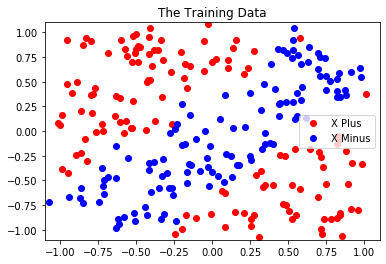

In [0]:
# Categorize the data
X_plus = np.asarray([X_train.T[row] for row in range(X_train.T.shape[0]) if y_train[row] > 0])
X_minus = np.asarray([X_train.T[row] for row in range(X_train.T.shape[0]) if y_train[row] < 0])

# Setting up the matplotlib plot....
fig, ax = plt.subplots()
ax.plot(X_plus[:, [1]], X_plus[:, [2]], 'ro', label='X Plus')
ax.plot(X_minus[:, [1]], X_minus[:, [2]], 'bo', label='X Minus')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_title("The Training Data")
_ = ax.legend()

In [0]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)
        #self.fc1.weight.data.fill_(0.0)  # Weights initialized to zero for Adaline!
        #self.fc2.weight.data.fill_(0.0)
        self.fc1.bias.data.fill_(0.0)
        self.fc2.bias.data.fill_(0.0)
        self.theta = nn.Tanh()

    def forward(self, x):
        s = self.theta(self.fc1(x))
        return self.theta(self.fc2(s))

    def _sign(self, x):
        return 1. if x >= 0 else -1.
        vsign = np.vectorize(self._sign)  # vectorize the function so it can apply elementwise op to array and return array

    def predict(self, x):
        return vsign(self.forward(x).detach())

In [0]:
ETA = 0.0025
X_coord = X_train[1:3, :] # (2, N), stack of N training column vectors
inputs_train = X_coord.T
adaline = Net()
optimizer = optim.SGD(adaline.parameters(), lr=ETA, momentum=0.3)

Train the model

In [0]:
NUM_ITERATIONS = 200
updates = 0
for epoch in range(NUM_ITERATIONS):
    for i, coord in enumerate(inputs_train):
        datapoint = Variable(torch.FloatTensor([coord]), requires_grad=True)
        label = Variable(torch.FloatTensor([y_train[i]]), requires_grad=False)
        optimizer.zero_grad()
        out = adaline(datapoint)
        loss = mse(out, label)
        loss.backward()
        optimizer.step()
        updates += 1
    if epoch % (NUM_ITERATIONS / 10) == 0:
        print(f'Epoch {epoch}, loss = {loss.data[0].item():2.5f}')
print(f'Epoch {epoch + 1}, loss = {loss.data[0].item():2.5f}')
print(f'Total updates = {updates}')
print(f'Parameter values = {list(adaline.parameters())}')

Epoch 0, loss = 1.16864
Epoch 20, loss = 1.09801
Epoch 40, loss = 0.16440
Epoch 60, loss = 0.01470
Epoch 80, loss = 0.00374
Epoch 100, loss = 0.00148
Epoch 120, loss = 0.00074
Epoch 140, loss = 0.00043
Epoch 160, loss = 0.00028
Epoch 180, loss = 0.00020
Epoch 200, loss = 0.00015
Total updates = 50000
Parameter values = [Parameter containing:
tensor([[ 2.8656, -2.8921],
        [ 2.8957, -2.7122]], requires_grad=True), Parameter containing:
tensor([ 0.8634, -1.6708], requires_grad=True), Parameter containing:
tensor([[-2.9604,  3.5561]], requires_grad=True), Parameter containing:
tensor([2.6135], requires_grad=True)]


In [0]:
weights = adaline.fc1.weight.detach().numpy()
bias = adaline.fc1.bias.detach().numpy()
learned_w = np.append(bias, weights).reshape(3,2)
print(f'Adaline learned the weights\n {learned_w}')
print_perf(adaline, inputs_train, y_train)

Adaline learned the weights
 [[ 0.86337847 -1.6707793 ]
 [ 2.8655713  -2.8920937 ]
 [ 2.895709   -2.7121668 ]]
num_correct: 242   num_total: 250
Accuracy =  96.80%, error =  3.20%


Parse and analyze the test data set

In [0]:
# Set up empty vectors for capturing data from train.dat
x0_test = []
x1_test = []
y_test = []

# Open the mapped Google drive and parse the training data
#with open('test.dat', 'r') as f:
with open('train.dat', 'r') as f:
    data = f.readlines()
    for N, i in enumerate(data):
        row = i.rstrip().lstrip().split(",")
        for j in row:
            num = j.rstrip().lstrip().split("  ")
            x0_test.append(float(num[0]))
            x1_test.append(float(num[1]))
            y_test.append(float(num[2]))

N += 1 # Adjust for the offset starting at 0

# Join the x inputs into a matrix
X_test = np.vstack((x0_test, x1_test))
X_test = np.vstack((np.ones((1, N)), X_test))  # N points of (d + 1) dimensions, with 1st dim = 1.

# Convert to numpy arrays
y_test = np.asarray(y_test).reshape(N, 1)
X_coord = X_test[1:3, :] # (2, N), stack of N test column vectors
inputs_test = X_coord.T
print_perf(adaline, inputs_test, y_test)

num_correct: 25   num_total: 25
Accuracy =  100.00%, error =  0.00%
